# Distance Measures in Unsupervised Learning

Distance measures are used to quantify the similarity or dissimilarity between data points.
They play a crucial role in unsupervised learning algorithms such as clustering,
dimensionality reduction, and nearest-neighbor-based methods.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_wine
from scipy.spatial import distance

In [ ]:
# Load the wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names

In [ ]:
# Select two sample points
x1 = X[0]
x2 = X[1]

In [ ]:
print("Selected Features : \n")
print(feature_names)
print("\nSample 1:\n", x1)
print("\nSample 2:\n", x2)

Selected Features : 

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Sample 1:
 [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]

Sample 2:
 [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]


# Euclidean Distance

- Euclidean Distance is the most commonly used distance metric. It measures the straight-line
distance between two points in Euclidean space.

### Mathematical Formula
For two points \( x = (x_1, x_2, ..., x_n) \) and \( y = (y_1, y_2, ..., y_n) \):

\
$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$


In [ ]:
EuD = distance.euclidean(x1, x2)
print(f'Euclidean Distance : {EuD:.3f}')

Euclidean Distance : 31.265


# Manhattan / City-Block Distance

- Manhattan Distance, also known as City Block Distance, measures the distance between two
points as the sum of absolute differences of their coordinates.

### Mathematical Formula
\
  $
d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$


In [ ]:
ManD = distance.cityblock(x1, x2)
print(f'Manhattan / City-Block Distance : {ManD:.3f}')

Manhattan / City-Block Distance : 51.060


# Minkowski Distance
- Minkowski Distance is a generalized distance metric that includes Euclidean and Manhattan
distances as special cases.

### Mathematical Formula
\[
$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$

In [ ]:
# p=1 is for Manhattan Distance
MinD1 = distance.minkowski(x1, x2, p=1)
print(f'Minkowski Distance for p=1 : {MinD1:.3f}')

# p=2 is for Euclidean Distance
MinD2 = distance.minkowski(x1, x2, p=2)
print(f'Minkowski Distance for p=2 : {MinD2:.3f}')

MinD3 = distance.minkowski(x1, x2, p=3)
print(f'Minkowski Distance for p=3 : {MinD3:.3f}')

Minkowski Distance for p=1 : 51.060
Minkowski Distance for p=2 : 31.265
Minkowski Distance for p=3 : 28.499


# Hamming Distance
- Hamming Distance measures the number of positions at which two vectors differ.
It is mainly used for categorical or binary data.

### Mathematical Definition
\
  $
d(x, y) = \text{Number of mismatched elements}
$

In [ ]:
x1_binary = x1 > np.mean(X, axis=0)
x2_binary = x2 > np.mean(X, axis=0)

HamD = distance.hamming(x1_binary, x2_binary)
print(f'Hamming Distance : {HamD:.3f}')

Hamming Distance : 0.231


# Cosine Similarity
- Cosine Similarity measures the cosine of the angle between two vectors, focusing on
direction rather than magnitude.

### Mathematical Formula
\
$
\text{Cosine Similarity} = \frac{x \cdot y}{||x|| \cdot ||y||}
$

### Distance Conversion
\
$
\text{Cosine Distance} = 1 - \text{Cosine Similarity}
$

In [ ]:
print(x1, x2)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]


In [ ]:
CoS1 = distance.cosine(x1, x2)
print(f'Cosine Similarity : {CoS1:.3f}')

Cosine Similarity : 0.000


In [ ]:
# Cosine Dissimilarity
CoS2 = 1 - distance.cosine(x1, x2)
print(f'Cosine Dissimilarity : {CoS2:.3f}')

Cosine Dissimilarity : 1.000


# Jaccard Distance
- Jaccard Distance measures dissimilarity between two sets based on their intersection
and union.

### Mathematical Formula
\
$
\text{Jaccard Distance} = 1 - \frac{|A \cap B|}{|A \cup B|}
$

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [ ]:
threshold = np.mean(X, axis=0)
x1_binary = x1 > threshold
x2_binary = x2 > threshold

A = set(np.where(x1_binary)[0])
B = set(np.where(x2_binary)[0])

# Compute Jaccard Similarity
JaSi = len(A & B) / len(A | B)

print(f"Jaccard Similarity : {JaSi:.3f}")

Jaccard Similarity : 0.700


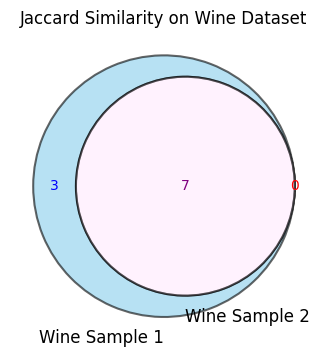

In [ ]:
# Visualization
plt.figure(figsize=(4, 4))
venn = venn2(
    [A, B],
    set_labels=('Wine Sample 1', 'Wine Sample 2'),
    set_colors=('skyblue', 'lightcoral'),
    alpha=0.6
)

# Set outline colors and thickness
for patch in venn.patches:
    if patch is not None:
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)

# Customize label colors
venn.get_label_by_id('10').set_color('blue')
venn.get_label_by_id('01').set_color('red')
venn.get_label_by_id('11').set_color('purple')

plt.title("Jaccard Similarity on Wine Dataset")
plt.show()


Jaccard Similarity: 0.43



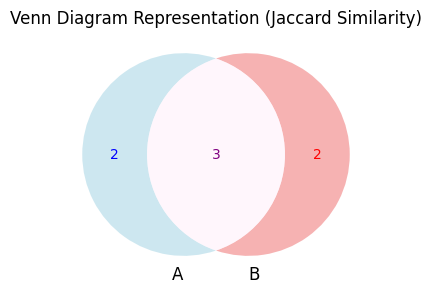

In [ ]:
# Another example for Jaccard Similarity

# Define two sets
A = {1, 2, 3, 4, 5}
B = {3, 4, 5, 6, 7}

# Compute Jaccard Similarity
jaccard_sim = len(A & B) / len(A | B)

print(f"Jaccard Similarity: {jaccard_sim:.2f}\n")

# Visualization
plt.figure(figsize=(4, 4))
venn = venn2(
    [A, B],
    set_labels=('A', 'B'),
    set_colors=('lightblue', 'lightcoral'),
    alpha=0.6
)

venn.get_label_by_id('10').set_color('blue')
venn.get_label_by_id('01').set_color('red')
venn.get_label_by_id('11').set_color('purple')

plt.title("Venn Diagram Representation (Jaccard Similarity)")
plt.show()


# Chebyshev Distance
- Chebyshev Distance measures the maximum absolute difference between any coordinate
dimensions of two points.

### Mathematical Formula
\
$
d(x, y) = \max(|x_i - y_i|)
$

In [ ]:
ChD = distance.chebyshev(x1, x2)
print(f"Chebyshev Distance : {ChD:.3f}")

Chebyshev Distance : 27.000


# Canberra Distance
- Canberra Distance is a weighted version of Manhattan Distance that emphasizes
small changes near zero.

### Mathematical Formula
\
$
d(x, y) = \sum_{i=1}^{n} \frac{|x_i - y_i|}{|x_i| + |y_i|}
$

In [ ]:
CaD = distance.canberra(x1, x2)
print(f"Canberra Distance : {CaD:.3f}")

Canberra Distance : 1.012


# Bray-Curtis Distance
- Bray-Curtis Distance measures dissimilarity between two vectors based on their magnitude
differences.

### Mathematical Formula
\
$
d(x, y) = \frac{\sum |x_i - y_i|}{\sum |x_i + y_i|}
$

In [ ]:
BrCD = distance.braycurtis(x1, x2)
print(f"Bray–Curtis Distance : {BrCD:.3f}")

Bray–Curtis Distance : 0.021


# Mahalanobis Distance
- Mahalanobis Distance measures the distance between a point and a distribution by
considering correlations between variables.

### Mathematical Formula
\
$
d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}
$

where \( S \) is the covariance matrix.

In [ ]:
# Covariance matrix of the dataset
cov_mat = np.cov(X, rowvar=False)
print(cov_mat)

[[ 6.59062328e-01  8.56113090e-02  4.71151590e-02 -8.41092903e-01
   3.13987812e+00  1.46887218e-01  1.92033222e-01 -1.57542595e-02
   6.35175205e-02  1.02828254e+00 -1.33134432e-02  4.16978226e-02
   1.64567185e+02]
 [ 8.56113090e-02  1.24801540e+00  5.02770393e-02  1.07633171e+00
  -8.70779534e-01 -2.34337723e-01 -4.58630366e-01  4.07333619e-02
  -1.41146982e-01  6.44838183e-01 -1.43325638e-01 -2.92447483e-01
  -6.75488666e+01]
 [ 4.71151590e-02  5.02770393e-02  7.52646353e-02  4.06208278e-01
   1.12293658e+00  2.21455913e-02  3.15347299e-02  6.35847140e-03
   1.51557799e-03  1.64654327e-01 -4.68215451e-03  7.61835841e-04
   1.93197391e+01]
 [-8.41092903e-01  1.07633171e+00  4.06208278e-01  1.11526862e+01
  -3.97476036e+00 -6.71149146e-01 -1.17208281e+00  1.50421856e-01
  -3.77176220e-01  1.45024186e-01 -2.09118054e-01 -6.56234368e-01
  -4.63355345e+02]
 [ 3.13987812e+00 -8.70779534e-01  1.12293658e+00 -3.97476036e+00
   2.03989335e+02  1.91646988e+00  2.79308703e+00 -4.55563385e-01


In [ ]:
# Inverse of covariance matrix
inv_cov_mat = np.linalg.inv(cov_mat)

In [ ]:
MahaD = distance.mahalanobis(x1, x2, inv_cov_mat)
print(f"Mahalanobis Distance : {MahaD:.3f}")

Mahalanobis Distance : 3.941


# Results & Conclusion


The experiment shows that different distance measures capture different aspects of
similarity between data points.

Euclidean, Manhattan, and Minkowski distances indicate
moderate separation, while Chebyshev highlights the maximum deviation in a single feature.

Cosine similarity shows no directional similarity, whereas Jaccard similarity indicates
high overlap between features.

Canberra and Bray–Curtis distances emphasize relative
differences and overall similarity, and Mahalanobis distance accounts for feature
correlation and scale.

Hence, the choice of distance measure depends on the data type
and application.

In [ ]:
print(f'Euclidean Distance : {EuD:.3f}')
print(f'Manhattan / City-Block Distance : {ManD:.3f}')
print(f'Minkowski Distance for p=3 : {MinD3:.3f}')
print(f'Hamming Distance : {HamD:.3f}')
print(f'Cosine Similarity : {CoS1:.3f}')
print(f"Jaccard Similarity : {JaSi:.3f}")
print(f"Chebyshev Distance : {ChD:.3f}")
print(f"Canberra Distance : {CaD:.3f}")
print(f"Bray–Curtis Distance : {BrCD:.3f}")
print(f"Mahalanobis Distance : {MahaD:.3f}")

Euclidean Distance : 31.265
Manhattan / City-Block Distance : 51.060
Minkowski Distance for p=3 : 28.499
Hamming Distance : 0.231
Cosine Similarity : 0.000
Jaccard Similarity : 0.700
Chebyshev Distance : 27.000
Canberra Distance : 1.012
Bray–Curtis Distance : 0.021
Mahalanobis Distance : 3.941
